## AOC project 6

# imports


In [1]:
import numpy
import matplotlib
import os

In [2]:
class_names = [
    {"name": "Wall", "classIndex": 0, "ADE20K_classIndex": 0},
    {"name": "Sky", "classIndex": 1, "ADE20K_classIndex": 2},
    {"name": "Tree", "classIndex": 2, "ADE20K_classIndex": 4},
    {"name": "Route", "classIndex": 3, "ADE20K_classIndex": 6},
    {"name": "Grass", "classIndex": 4, "ADE20K_classIndex": 9},
    {"name": "Earth", "classIndex": 5, "ADE20K_classIndex": 13},
    {"name": "Mountain", "classIndex": 6, "ADE20K_classIndex": 16},
    {"name": "Plant", "classIndex": 7, "ADE20K_classIndex": 17},
    {"name": "Water", "classIndex": 8, "ADE20K_classIndex": 21},
    {"name": "Sea", "classIndex": 9, "ADE20K_classIndex": 26},
    {"name": "Field", "classIndex": 10, "ADE20K_classIndex": 29},
    {"name": "Rock", "classIndex": 11, "ADE20K_classIndex": 34},
    {"name": "Sand", "classIndex": 12, "ADE20K_classIndex": 46},
    {"name": "River", "classIndex": 13, "ADE20K_classIndex": 60},
    {"name": "Hill", "classIndex": 14, "ADE20K_classIndex": 68},
    {"name": "Land", "classIndex": 15, "ADE20K_classIndex": 94},
    {"name": "Waterfall", "classIndex": 16, "ADE20K_classIndex": 113},
]

def generate_missing_segmenter_classes(class_names, segmenter_folder="segmenters"):
    os.makedirs(segmenter_folder, exist_ok=True)

    for class_info in class_names:
        class_name = class_info['name'].capitalize()
        segmenter_class_name = f"{class_name}Segmenter"
        file_name = f"{class_name}_segmenter.py"
        file_path = os.path.join(segmenter_folder, file_name)
        if not os.path.exists(file_path):

            with open(file_path, "w") as file:
                file.write(f"from Segmenter import Segmenter\n\n")
                file.write(f"import numpy as np\n\n")
                file.write(f"class {segmenter_class_name}(Segmenter):\n")
                file.write(f"    def __init__(self, class_info):\n")
                file.write(f"        super().__init__(class_info)\n\n")
                file.write(f"    def segment(self, image, mask):\n")
                file.write(f"        print(f\"Segmenting {class_name}...\")\n")
                file.write(f"        # Placeholder segmentation logic for {class_name}\n")
                file.write(f"        segmentation_mask = (mask == self.class_index).astype(np.uint8)\n")
                file.write(f"        return self.apply_mask(image, segmentation_mask)\n\n")
                file.write(f"    def apply_mask(self, image, mask):\n")
                file.write(f"        pass\n\n")

            print(f"Generated segmenter class for '{class_name}' in '{file_path}'")
        else:
            print(f"Segmenter class for '{class_name}' already exists at '{file_path}'")

generate_missing_segmenter_classes(class_names)

Segmenter class for 'Wall' already exists at 'segmenters/Wall_segmenter.py'
Segmenter class for 'Sky' already exists at 'segmenters/Sky_segmenter.py'
Segmenter class for 'Tree' already exists at 'segmenters/Tree_segmenter.py'
Segmenter class for 'Route' already exists at 'segmenters/Route_segmenter.py'
Segmenter class for 'Grass' already exists at 'segmenters/Grass_segmenter.py'
Segmenter class for 'Earth' already exists at 'segmenters/Earth_segmenter.py'
Segmenter class for 'Mountain' already exists at 'segmenters/Mountain_segmenter.py'
Segmenter class for 'Plant' already exists at 'segmenters/Plant_segmenter.py'
Segmenter class for 'Water' already exists at 'segmenters/Water_segmenter.py'
Segmenter class for 'Sea' already exists at 'segmenters/Sea_segmenter.py'
Segmenter class for 'Field' already exists at 'segmenters/Field_segmenter.py'
Segmenter class for 'Rock' already exists at 'segmenters/Rock_segmenter.py'
Segmenter class for 'Sand' already exists at 'segmenters/Sand_segmenter.

In [3]:
from ImageSegmentation import ImageSegmentation
from Segmenter import  Segmenter
from DataLoader import  DataLoader
from Preprocessor import  Preprocessor

In [4]:
data_loader = DataLoader()
image_segmentator = ImageSegmentation(data_loader, class_names)

classes_to_analyze = ['Mountain', 'Water', 'Tree']
image_segmentator.select_classes(classes_to_analyze)

Selected class 'Mountain' with class index 6
Selected class 'Water' with class index 8
Selected class 'Tree' with class index 2


In [5]:
image_segmentator.load_data('quarter')  # Options: 'all', 'half', 'quarter', or an integer

Training SVM...
SVM training completed.
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84      5511
           1       0.16      0.65      0.26       418

    accuracy                           0.74      5929
   macro avg       0.56      0.70      0.55      5929
weighted avg       0.91      0.74      0.80      5929

Evaluating SVM...
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84      5511
           1       0.16      0.65      0.26       418

    accuracy                           0.74      5929
   macro avg       0.56      0.70      0.55      5929
weighted avg       0.91      0.74      0.80      5929



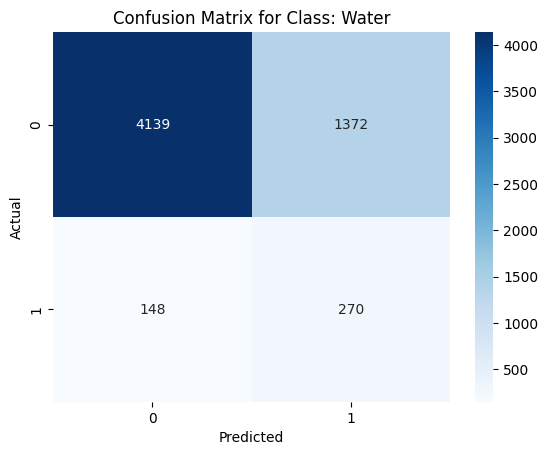


Visualizing results...
()
1.0


TypeError: Invalid shape () for image data

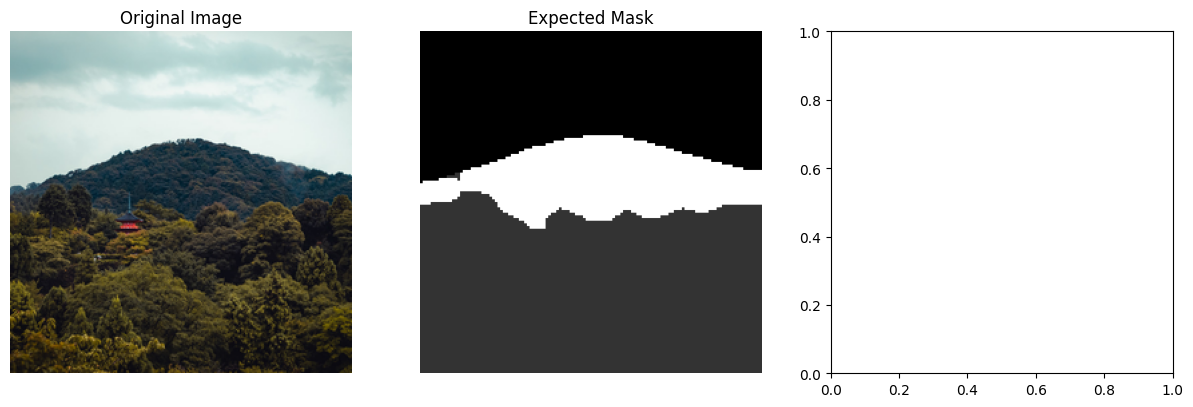

In [8]:
image_segmentator.svm_segmentation(num_of_images=5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

classes = np.unique(image_segmentator.data_loader.masks, return_counts=True)

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(classes[0], classes[1])
plt.xticks(classes[0], [class_names[i]["name"] for i in classes[0]])
plt.show()

In [ ]:
[class_names[i]["name"] for i in classes[0]]

In [ ]:
image_segmentator.data_loader.display_random_images_with_masks(5)

In [ ]:
image_segmentator.process_data(scale=0.5)

In [ ]:
image_segmentator.display_statistics(num_examples=5)